In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from tqdm import tqdm
import os
import pickle

# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa


warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

# pickle savedata
def save_data(df, filename):
    filename = os.path.join('./pickle', filename)
    with open(filename, "wb" ) as file:
        pickle.dump(df, file)

# pickle load data
def load_data(filename):
    filename = os.path.join('./pickle', filename)
    with open(filename, "rb" ) as file:
        return pickle.load(file)
    
def save(data):
    save_data(data, 'tmp')

def load():
    return load_data('tmp')

def check_shape(all_data):
    a = load()
    assert a.shape[0] == all_data.shape[0]

In [7]:
train_audio_path = './train/audio/'
filename = 'yes/0a7c2a8d_nohash_0.wav'

In [8]:
sample_rate, samples = wavfile.read(str(train_audio_path) + filename)

In [9]:
sample_rate

16000

In [10]:
samples

array([ 14,  -7, -14, ...,  19,  20,  27], dtype=int16)

## librosa import audio file

In [11]:
sample, sample_rate = librosa.load(train_audio_path + filename, sr=16000)

In [12]:
sample.shape

(16000,)

In [13]:
sample_rate

16000

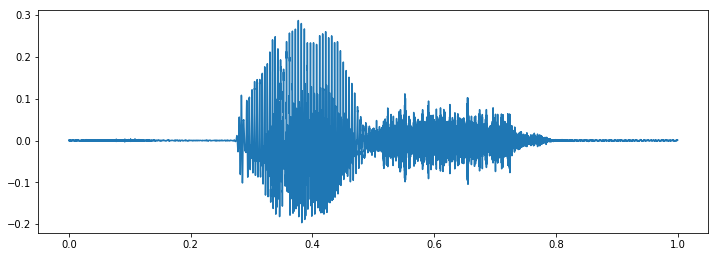

In [14]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(211)
ax.plot(np.linspace(0, 1, 16000), sample)

## define label

In [15]:
label = os.listdir(train_audio_path)

In [16]:
len(label)

31

In [17]:
label

['zero',
 'up',
 'bed',
 'two',
 'no',
 'right',
 'go',
 'seven',
 'four',
 'off',
 'on',
 'left',
 'down',
 'three',
 'eight',
 'wow',
 'bird',
 'sheila',
 'house',
 'stop',
 'five',
 'tree',
 'one',
 'happy',
 'marvin',
 'dog',
 'yes',
 'cat',
 'nine',
 '_background_noise_',
 'six']

In [18]:
x = []
y = []
SAMPLE_RATE = 8000

In [19]:
for i in tqdm(label):
    print(i)
    wav = [f for f in os.listdir(os.path.join(train_audio_path, i)) if f.endswith('.wav')]
    print(wav[:2])
    for file in wav:
        sample, sample_rate = librosa.load(os.path.join(train_audio_path, i, file), sr=SAMPLE_RATE)
        if len(sample) == SAMPLE_RATE:
            x.append(sample)
            y.append(i)    

  0%|          | 0/31 [00:00<?, ?it/s]

zero
['6b7d5101_nohash_1.wav', 'bdee441c_nohash_0.wav']


  0%|          | 0/31 [00:03<?, ?it/s]


KeyboardInterrupt: 

In [20]:
x = np.array(x)
y = np.array(y)

In [ ]:
save_data(x, 'x')
save_data(y, 'y')

In [21]:
x = load_data('x')
y= load_data('y')

In [22]:
x = x.reshape(-1, 8000, 1)

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()

In [25]:
y = le.fit_transform(y)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, stratify=y, test_size=0.2, random_state=34)

In [28]:
from keras import Sequential
from keras.layers import Dense, Dropout, Conv1D, Flatten, MaxPooling1D, MaxPool1D

Using TensorFlow backend.


In [29]:
model = Sequential()
model.add(Conv1D(64, 7, activation='relu', input_shape=(8000, 1)))
model.add(MaxPool1D(3))
model.add(Dropout(0.3))

model.add(Conv1D(32, 9, activation='relu'))
model.add(MaxPool1D(3))
model.add(Dropout(0.3))

model.add(Conv1D(16, 11, activation='relu'))
model.add(MaxPool1D(3))
model.add(Dropout(0.3))

model.add(Conv1D(8, 13, activation='relu'))
model.add(MaxPool1D(3))
model.add(Dropout(0.3))
          
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(31, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 7994, 64)          512       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2664, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2664, 64)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2656, 32)          18464     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 885, 32)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 885, 32)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 875, 16)          

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [32]:
model.fit(x_train, y_train, 
          batch_size=128, 
          validation_data=(x_valid, y_valid), 
          epochs=10
         )

Train on 47716 samples, validate on 11929 samples
Epoch 1/10


InternalError:  Dst tensor is not initialized.
	 [[{{node conv1d_1_input/_2}}]] [Op:__inference_keras_scratch_graph_2464]

Function call stack:
keras_scratch_graph
